In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.stattools as stats
import statsmodels.formula.api as sm
import statsmodels.api as sma
import statsmodels.tsa.api as smt
import statsmodels as stat
import linearmodels as lm
import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

import datetime
import hvplot.pandas 
from scipy.stats import norm

# 1. Importing data and cleaning

In [2]:
df = pd.read_csv(r'C:\Users\Mathis Mourey\Downloads\cleandata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,9,11,12,15,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# get datetime dates and redefine a new dataframe with variable of interest.
ts = pd.to_datetime(df['Geplande datum/tijd'], errors='coerce')
red_df = df[['Pay pax', 'Maatschappij']]
red_df['timestamp'] = ts
red_df

<ipython-input-3-1129340ca5da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df['timestamp'] = ts


Pay pax              Maatschappij           timestamp
0           NaN                       NaN 2021-08-31 08:50:00
1           NaN                       NaN 2021-08-31 07:00:00
2           NaN                       NaN 2021-08-31 07:14:00
3           NaN                       NaN 2021-08-31 06:15:00
4           NaN                       NaN 2021-08-31 07:10:00
...         ...                       ...                 ...
857156      NaN                       NaN 2021-03-24 10:10:00
857157      NaN                       NaN 2021-06-11 05:30:00
857158      NaN                       NaN 2021-03-18 20:00:00
857159      NaN  Air Hamburg Private Jets 2020-05-28 13:36:00
857160      NaN                       NaN 2021-08-31 09:00:00

[857161 rows x 3 columns]

In [4]:
all_firms = red_df['Maatschappij'].unique()
for i in all_firms:
    print(i)

nan
Transavia
Freebird Europe
75;Transavia
68;Transavia
78;Transavia
TUI fly Nederland
Corendon Airlines
PAD Aviation Service
Pink Sparrow
Bartolini Air Regiobal
Croatia Airlines
Global Jet Luxembourg
Air Alsie
76;Transavia
NetJets Europe
Binair GmbH
Pegasus
Freebird
France - Navy
Enter Air
79;Corendon Airlines
Luxaviation
ExcellentAir
Shell Aircraft Ltd.
Jet2
Jet Executive
Gestair Executive Jet
70;Transavia
Fly Tyrol
Air Hamburg Private Jets
Daimler-Chrysler Aviation
Valljet
GlobeAir
RedStar Aviation
Copenhagen Airtaxi
Jetflite
Aeropartner
Valair Private Jets
Vistajet
Sirius Aero
Lux Air Ambulance
77;TUI fly Nederland
KLM
Jetcall
NordJet Airlines
Irish Air Corps
79;Transavia
Air Bohemia
KLPD Luchtvaartpolitie
Exxaero
Helvetic Airways
Smart Aero Solution
Flying Group Luxembourg
RVL Group
Air Europa
IXair
75;Pegasus
65;Transavia
Heron Aviation
Air Charter Scotland
Jetstream Air
Silesia Air
Goldeck Flug
FAI Air Service
Hyperion
Jet Concierge Club
Severstal Air Company
Luxwing
Silver Clou

BURKINA FA
PRIME AVIA
SOLID AIR
ACM AVIATI
AD AVIATIO
MERIDIAN S
L.S. VERWE
YPSILON B.
VISTAJET G
MR. CHRIS
INSIGHTS
SERVICE PE
COOPERATIE
CIMBER AIR
BFS - BELG
ROYAL DANI
INTERLEASE
FINNCOMM A
OCCITANIA
FINLAND AI
PHIL-R
G.C.B. BEH
PHENOM CLU
U.P.C. AVI
AIR WINTON
TAI LEASIN
PRESTIGE J
AD ASTRA E
OY-SVM
ALITALIA C
AIR EXPLOR
INT AIR SE
GLOBAL MIS
TEST & TRA
DHR. NIELA
KRISMAR
MCCAIN FOO
KNICKERBOC
FLAIRJET L
PARI HOLDI
ACH HAMBUR
DORNIER SE
HEXACONSEI
AMBEO PLC
ALIPARMA
DEVON ENER
GROSSMANN
AEROCLUB C
EASTMAN CH
CESSNA AIR
VHM FLIGHT
LIMBURGSE
CLOCK GMBH
PHOENIX AI
SOFTNOTES
A.C.V.T.
COCO AIR L
BERGAIR SA
OCKHUIZEN
WILLIAMS A
SWAN AVIAT
RNAV EUROP
FLY BE LTD
G3 AVIATIO
N66PY
WIJET
ALLPLANES
IGOR ANNEN
US BANK NA
AMSTERDAM
KEMPEN B.V
GRANDE AVI
G-BEZK
SMALL PLAN
VOLO AVIAT
ENEX AVIAT
BREITENBAC
BUIJTENDIJ
GEMUE
PNC FINANC
SUDWESTFLU
SCINTILLA
BASF AG FL
BHARAT FOR
STARJET LT
QUICKNET A
NOBLEWOOD
COBHAM FLI
LEGO SYSTE
ZYGMUNT SO
AIRGO FLUG
X
FEDERATION
STALLION E
JET CLUB L
SOUTHERN C
L

JJE AIRPLA
VOLARE SPA
C-FRIY
MONARCH GE
EASSDA IRE
WTM TRANSP
GIE AGEM A
J.T. VAN D
AIR MEDITE
SNC SUNRIS
SA DASSAUL
BLUE RIDGE
H.J. HEIJS
CANTONAIR
VIP AVIATI
KENNETH PE
INTERFLY S
ALA SERVIC
SILVER BIR
PONNIAH SA
GENERAL DY
KANDAHAR N
ROSCO BEHE
BONDCO INC
JETAWAY AI
BANNERT AI
NOT YOURS
SNC OCIM L
JET 2000 L
AIR MANA
GGAJB GROU
UKRAINA AI
MALIBU AVI
CABI AIRLI
DAIMLERCHR
EARLYBIRDS
BOLWERK;
PRODUCTION
HAWKER PAR
GRAND AVIA
EJM
M.A.P. MAN
KLU /DIR E
KONTANT BE
OY-NUT I/S
ALCHEMIST
HELI CHALL
FLYLINK EX
APM USA
GS 150-217
EDS INT SE
ST. KATANA
SEAGLE JET
EMERSON FL
HERTZ CORP
PETER ANDE
CHARLOTTE
CIRRUS GAS
FPL
MERHAVMNF.
THE FLYING
PROPS & PL
TAK SERVIC
AIR TRANS
KEYCORP AV
ROONEY HOL
MILAN KONS
AFRIJET BU
GO AVIATIO
PIERRE MAE
SECURITE C
HJELMCO OI
GRAFAIR AG
EXTER OCTR
AIR GREENL
HVILAN I/S
BELDEROK;
ABAB B.V.
ALIVEN
WIZZ AIR
CBAIR LLC
SKYBLUE BU
VOLKSWAGEN
ATV AVIATI
AYEET AVIA
BASE OPS I
STESCO LTD
LIVING WOR
NCIM GROEP
FARAVIA
G.DAFGARD
LOWLANDS A
KARMANN
KIMMERLE G
ARCUS-AIR
FG

F.H.S. HAN
DORNIER FL
HABEL
MALMO AVN
IG PCI AG
WETTSTEIN;
SEITZ; MR.
JENNY; MR.
RHYN; MR.
HUBER; MR.
SATTEL; MR
BUHLMANN;
JACOB; MR.
BRUNNER; M
VONBANK; M
LEUTWILER;
BENNINGER;
CITY AIR G
GOLD STONE
VPAIR
FALCON WIN
AIR TOURIN
JETSTAR B.
AEROCLUB T
SILK WAY
DAIMOND FL
20TH AIR T
ETAT FRANC
ENVISCOPE
SOONS
SCHILLING;
G.A.T.C.
MAES JAN N
HARTVIG AV
CYMA PETRO
SPECIALISE
JETAILLIAN
AMIOT; MR.
SARA LEE C
CLAREMONT
ASMAN
PREUSSER
GALLIC AVI
HELI SEVIC
EYE IN THE
SERVAIR PR
ELITE
MOTORFLUG-
CBG AVIATI
AVIA SUD L
ORTECH AIR
KLAUS
AVIATION D
SOUTHEND F
FARNAIR NE
ISE  BVBA
FLYNOR JET
WHITE KNUC
MEDIA ONLI
FORD MOTOR
PORTWAY AV
RUIZ; MR.
SENASA
BILAHN B.V
ZWEEFVLIEG
TG AVIATIO
VOLARE AIR
VERHAEGHE
JONG; DHR.
HUGHSTON A
JONGH; DHR
BEN AIR F.
MULLER AIR
PICTON II
VOGEL
SPITZKE FL
WEST AIR S
J & P GROU
ROCKWELL I
BP AMERICA
EPPS AIR S
WESTAIR AV
GREENPEACE
CENTRUM BA
KERR-MCGEE
E.P.A.G.
BAMFORD EX
AIR OMEGA
AVIORIPRES
PACAIR INC
FALCON AIR
DONBASS-EA
SOBELAIR
HEEREMA GR
AT&T AVIAT
KASTELIJN
WHITE

In [5]:
firm = all_firms

<AxesSubplot:xlabel='timestamp'>

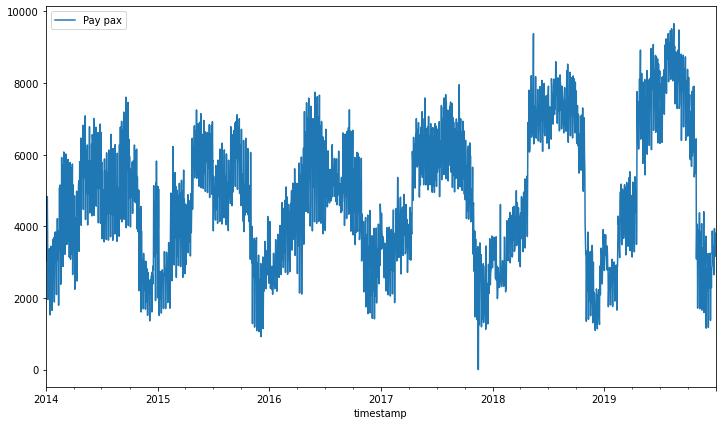

In [6]:
# Visualizing the raw data
data = (red_df.set_index('timestamp')
        .resample('D').sum()
        ['2014':'2019']
       )
data.plot(figsize=(12,7))

### Features creation

1. Create features for months, days, weeks, etc.

In [7]:
# Function to find the number of the week in a month
def WeekNumber(date_value):
    week = date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1] + 1
    return date_value.isocalendar()[1] if week < 0 else week

# Rename for use in the regression
data = data.rename(columns={"Pay pax": "Pay_pax"})

data['Days_of_year'] = data.index.dayofyear
data['Month'] = data.index.month
data['Week'] = data.index.week
data['Week_Month'] = [WeekNumber(i) for i in data.index]
data['Day_Number'] = data.index.day

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day_Name'] = data.index.day_name()

data['Time'] = [i for i in range(len(data))]
data['Time2'] = data['Time']**2

data['Pay_pax_L1'] = data['Pay_pax'].shift(-1)
data = data.fillna(0)

# One data point is negative (to be retreated)
data[data['Pay_pax'] < 1] = 1
data

<ipython-input-7-ac6fd0358aae>:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['Week'] = data.index.week


Pay_pax  Days_of_year  Month  Week  Week_Month  Day_Number  \
timestamp                                                                
2014-01-01   3167.0             1      1     1           1           1   
2014-01-02   3361.0             2      1     1           1           2   
2014-01-03   4828.0             3      1     1           1           3   
2014-01-04   3023.0             4      1     1           1           4   
2014-01-05   4821.0             5      1     1           1           5   
...             ...           ...    ...   ...         ...         ...   
2019-12-27   3937.0           361     12    52           5          27   
2019-12-28   3235.0           362     12    52           5          28   
2019-12-29   3810.0           363     12    52           5          29   
2019-12-30   3582.0           364     12     1           1          30   
2019-12-31   3165.0           365     12     1           1          31   

             Day_Name  Time    Time2  Pay_pax_L1  
timestamp                                         
2014-01-01  Wednesday     0        0      3361.0  
2014-01-02   Thursday     1        1      4828.0  
2014-01-03     Friday     2        4      3023.0  
2014-01-04   Saturday     3        9      4821.0  
2014-01-05     Sunday     4       16      3757.0  
...               ...   ...      ...         ...  
2019-12-27     Friday  2186  4778596      3235.0  
2019-12-28   Saturday  2187  4782969      3810.0  
2019-12-29     Sunday  2188  4787344      3582.0  
2019-12-30     Monday  2189  4791721      3165.0  
2019-12-31    Tuesday  2190  4796100         0.0  

[2191 rows x 10 columns]

<AxesSubplot:xlabel='Month'>

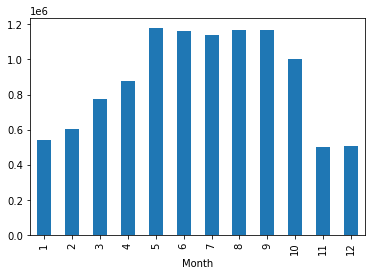

In [8]:
# Visualize possible seasonal effects (monthly, weekly, daily?)
(data.groupby('Month')
 .sum()
 ['Pay_pax']
 .plot.bar())

### Visualizating the dataset

1. Autorcorrelation
2. Normality
3. Stationarity

In [9]:
def tsplot(y, lags=None, figsize=(10,8), style='bmh'):
    if not isinstance(y,pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3,2)
        ts_ax = plt.subplot2grid(layout,(0,0),colspan=2)
        acf_ax = plt.subplot2grid(layout,(1,0))
        pacf_ax = plt.subplot2grid(layout,(1,1))
        qq_ax = plt.subplot2grid(layout,(2,0))
        pp_ax = plt.subplot2grid(layout,(2,1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Serie Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sma.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        ss.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

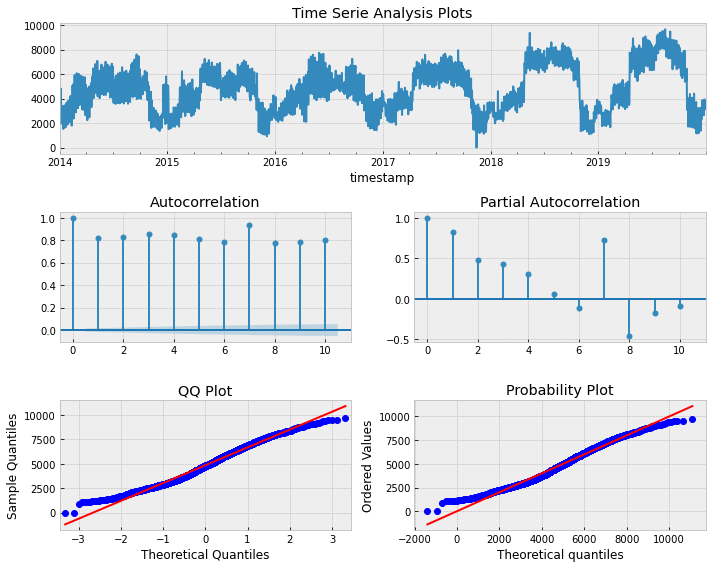

In [10]:
tsplot(data['Pay_pax'], lags=10)

## Creating the training & testing sets + implementing features

In [151]:
#Partition the data into a train and test set
y_to_train = data['2016':'2019-06'] # dataset to train
y_to_val = data['2019-07':] # last X months for test  
predict_date = len(data) - len(data[:'2019-06'])
predict_date

184

In [152]:
y_to_train['Pay_pax_L1'] =y_to_train['Pay_pax'].shift(-1)
y_to_train['Pay_pax_L2'] =y_to_train['Pay_pax'].shift(-2)
y_to_train['Pay_pax_L3'] =y_to_train['Pay_pax'].shift(-3)

y_to_val['Pay_pax_L1'] =y_to_val['Pay_pax'].shift(-1)
y_to_val['Pay_pax_L2'] =y_to_val['Pay_pax'].shift(-2)
y_to_val['Pay_pax_L3'] =y_to_val['Pay_pax'].shift(-3)


<ipython-input-152-97564dd502cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['Pay_pax_L1'] =y_to_train['Pay_pax'].shift(-1)
<ipython-input-152-97564dd502cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['Pay_pax_L2'] =y_to_train['Pay_pax'].shift(-2)
<ipython-input-152-97564dd502cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

<ipython-input-153-6b896cb68f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['R_Mean_10'] = y_to_train['Pay_pax'].rolling(10).mean()
<ipython-input-153-6b896cb68f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['R_Vol_10'] = y_to_train['Pay_pax'].rolling(10).std()
<ipython-input-153-6b896cb68f56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

<AxesSubplot:xlabel='timestamp'>

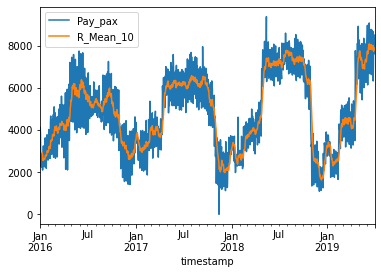

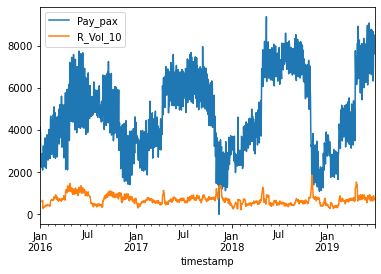

In [153]:
y_to_train['R_Mean_10'] = y_to_train['Pay_pax'].rolling(10).mean()
y_to_train['R_Vol_10'] = y_to_train['Pay_pax'].rolling(10).std()

y_to_val['R_Mean_10'] = y_to_val['Pay_pax'].rolling(10).mean()
y_to_val['R_Vol_10'] = y_to_val['Pay_pax'].rolling(10).std()

y_to_train[['Pay_pax', 'R_Mean_10']].plot()
y_to_train[['Pay_pax', 'R_Vol_10']].plot()

In [154]:
y_to_train

Pay_pax  Days_of_year  Month  Week  Week_Month  Day_Number  \
timestamp                                                                
2016-01-01   2981.0             1      1    53           1           1   
2016-01-02   3058.0             2      1    53           1           2   
2016-01-03   4132.0             3      1    53           1           3   
2016-01-04   3777.0             4      1     1           1           4   
2016-01-05   2266.0             5      1     1           1           5   
...             ...           ...    ...   ...         ...         ...   
2019-06-26   7069.0           177      6    26           5          26   
2019-06-27   8529.0           178      6    26           5          27   
2019-06-28   8057.0           179      6    26           5          28   
2019-06-29   7615.0           180      6    26           5          29   
2019-06-30   8005.0           181      6    26           5          30   

             Day_Name  Time    Time2  Pay_pax_L1  Pay_pax_L2  Pay_pax_L3  \
timestamp                                                                  
2016-01-01     Friday   730   532900      3058.0      4132.0      3777.0   
2016-01-02   Saturday   731   534361      4132.0      3777.0      2266.0   
2016-01-03     Sunday   732   535824      3777.0      2266.0      2556.0   
2016-01-04     Monday   733   537289      2266.0      2556.0      2626.0   
2016-01-05    Tuesday   734   538756      2556.0      2626.0      2850.0   
...               ...   ...      ...         ...         ...         ...   
2019-06-26  Wednesday  2002  4008004      8529.0      8057.0      7615.0   
2019-06-27   Thursday  2003  4012009      8057.0      7615.0      8005.0   
2019-06-28     Friday  2004  4016016      7615.0      8005.0         NaN   
2019-06-29   Saturday  2005  4020025      8005.0         NaN         NaN   
2019-06-30     Sunday  2006  4024036         NaN         NaN         NaN   

            R_Mean_10    R_Vol_10  
timestamp                          
2016-01-01        NaN         NaN  
2016-01-02        NaN         NaN  
2016-01-03        NaN         NaN  
2016-01-04        NaN         NaN  
2016-01-05        NaN         NaN  
...               ...         ...  
2019-06-26     7758.2  885.556799  
2019-06-27     7733.8  857.402900  
2019-06-28     7877.0  766.392415  
2019-06-29     7902.8  751.132745  
2019-06-30     7829.2  693.741835  

[1277 rows x 14 columns]

In [155]:
#Create dummy variables for each months 
# Comment: dummy variables for days in the week do provide additional predictive power
# Comment: Dummy & radils for periods up and down provide non significant predicitive power

months ={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6,
         'July':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

for i in list(months.keys()):
    y_to_train[i] = [1 if months[i]==y_to_train['Month'][j] else 0 for j in range(len(y_to_train)) ]
    y_to_val[i] = [1 if months[i]==y_to_train['Month'][j] else 0 for j in range(len(y_to_val)) ]

y_to_val

<ipython-input-155-3fafc7b95efc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train[i] = [1 if months[i]==y_to_train['Month'][j] else 0 for j in range(len(y_to_train)) ]
<ipython-input-155-3fafc7b95efc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_val[i] = [1 if months[i]==y_to_train['Month'][j] else 0 for j in range(len(y_to_val)) ]


Pay_pax  Days_of_year  Month  Week  Week_Month  Day_Number  \
timestamp                                                                
2019-07-01   8340.0           182      7    27           1           1   
2019-07-02   6316.0           183      7    27           1           2   
2019-07-03   7226.0           184      7    27           1           3   
2019-07-04   7201.0           185      7    27           1           4   
2019-07-05   7976.0           186      7    27           1           5   
...             ...           ...    ...   ...         ...         ...   
2019-12-27   3937.0           361     12    52           5          27   
2019-12-28   3235.0           362     12    52           5          28   
2019-12-29   3810.0           363     12    52           5          29   
2019-12-30   3582.0           364     12     1           1          30   
2019-12-31   3165.0           365     12     1           1          31   

             Day_Name  Time    Time2  Pay_pax_L1  ...  Mar  Apr  May  June  \
timestamp                                         ...                        
2019-07-01     Monday  2007  4028049      6316.0  ...    0    0    0     0   
2019-07-02    Tuesday  2008  4032064      7226.0  ...    0    0    0     0   
2019-07-03  Wednesday  2009  4036081      7201.0  ...    0    0    0     0   
2019-07-04   Thursday  2010  4040100      7976.0  ...    0    0    0     0   
2019-07-05     Friday  2011  4044121      7607.0  ...    0    0    0     0   
...               ...   ...      ...         ...  ...  ...  ...  ...   ...   
2019-12-27     Friday  2186  4778596      3235.0  ...    0    0    0     1   
2019-12-28   Saturday  2187  4782969      3810.0  ...    0    0    0     1   
2019-12-29     Sunday  2188  4787344      3582.0  ...    0    0    0     1   
2019-12-30     Monday  2189  4791721      3165.0  ...    0    0    0     0   
2019-12-31    Tuesday  2190  4796100         NaN  ...    0    0    0     0   

            July  Aug  Sep  Oct  Nov  Dec  
timestamp                                  
2019-07-01     0    0    0    0    0    0  
2019-07-02     0    0    0    0    0    0  
2019-07-03     0    0    0    0    0    0  
2019-07-04     0    0    0    0    0    0  
2019-07-05     0    0    0    0    0    0  
...          ...  ...  ...  ...  ...  ...  
2019-12-27     0    0    0    0    0    0  
2019-12-28     0    0    0    0    0    0  
2019-12-29     0    0    0    0    0    0  
2019-12-30     1    0    0    0    0    0  
2019-12-31     1    0    0    0    0    0  

[184 rows x 26 columns]

In [156]:
# Check is periods up and down match actual variations 
#y_to_train[['Pay_pax', 'Period_up', 'Period_down']].plot()

# 2. Testing Models to predict the sum of passenger (daily)

### Train the model 1: Linear Regression w/ Time and Dummy Variables for Months

In [157]:
my_formula = "Pay_pax ~ Time2 + "+' + '.join(list(months.keys()))
my_formula

'Pay_pax ~ Time2 + Jan + Feb + Mar + Apr + May + June + July + Aug + Sep + Oct + Nov + Dec'

                            OLS Regression Results                            
Dep. Variable:                Pay_pax   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     318.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:18:15   Log-Likelihood:                -10524.
No. Observations:                1277   AIC:                         2.107e+04
Df Residuals:                    1264   BIC:                         2.114e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3884.5199     53.086     73.174      0.0

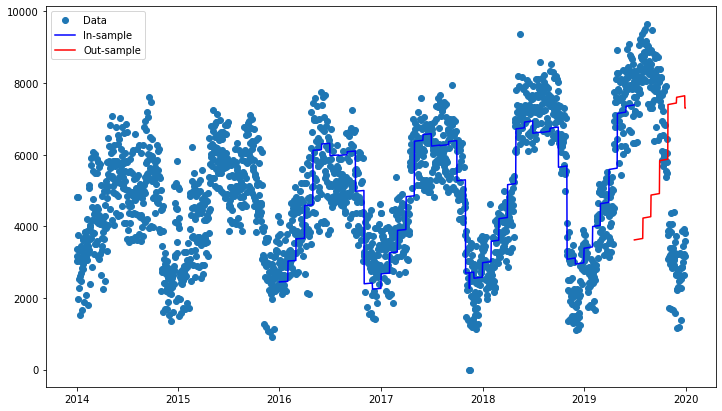

In [158]:
rslt = sm.ols(formula=my_formula, data=y_to_train).fit()
print(rslt.summary())

#insample
ypred = rslt.predict(y_to_train)

#outsample
pred_out = rslt.get_prediction(y_to_val).summary_frame(alpha=0.05)
pred_out = pred_out.set_index(y_to_val.index)
ypred_out_1 = pred_out['mean']
#ypred_UB = pred_out['mean_ci_upper']
#ypred_LB = pred_out['mean_ci_lower']


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax'], "o", label="Data")
ax.plot(ypred, "b-", label="In-sample")


ax.plot(ypred_out_1, "r-", label="Out-sample")
#ax.plot(ypred_UB, "r--", label="Out-sample UB")
#ax.plot(ypred_LB, "r--", label="Out-sample LB")

mse2 = ((ypred_out_1 - y_to_val['Pay_pax']) ** 2).mean()
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse2), 2)))

ax.legend(loc="best")

### Train model 2: Linear Regression w/ Time and Radial Variables for Months

In [159]:
# radial dummies 
from sklego.preprocessing import RepeatingBasisFunction as RBF
rbf = RBF(n_periods=12,
             column="Days_of_year",
             input_range=(1,365),
             remainder="drop")


In [160]:
rbf.fit(data)
radials = pd.DataFrame(index=data.index,
               	data=rbf.transform(data))
#radials.plot(subplots=True, figsize=(14, 8),
#     	sharex=True, title="Radial Basis Functions",
#     	legend=False);
radials.columns = list(months.keys())
#radials

In [161]:
y_to_train[list(months.keys())] = radials
y_to_val[list(months.keys())] = radials

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


                            OLS Regression Results                            
Dep. Variable:                Pay_pax   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     344.1
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:18:16   Log-Likelihood:                -10446.
No. Observations:                1277   AIC:                         2.092e+04
Df Residuals:                    1263   BIC:                         2.099e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.063e+05   3.32e+05     -0.923      0.3

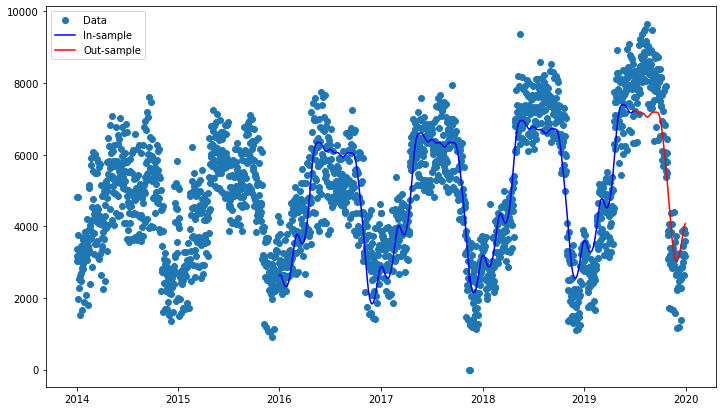

In [162]:
rslt = sm.ols(formula=my_formula, data=y_to_train).fit()
ypred = rslt.predict(y_to_train)
ypred_out_2 = rslt.predict(y_to_val)
print(rslt.summary())


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax'], "o", label="Data")
ax.plot(ypred, "b-", label="In-sample")
ax.plot(ypred_out_2, "r-", label="Out-sample")
ax.legend(loc="best")

mse2 = ((ypred_out_2 - y_to_val['Pay_pax']) ** 2).mean()
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse2), 2)))
    

### Train model 3: WLS Regression w/ Time and Radial Variables for Months

In [163]:
# Get exponential importance 

x = [int(i) for i in range(1, len(data))]
y = [int(i) for i in range(1, len(data))]
p = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_w = np.linspace(np.min(x), np.max(x), len(data))
y_w = a * np.exp(b * x_w)

The Root Mean Squared Error of our forecast is 1035.76


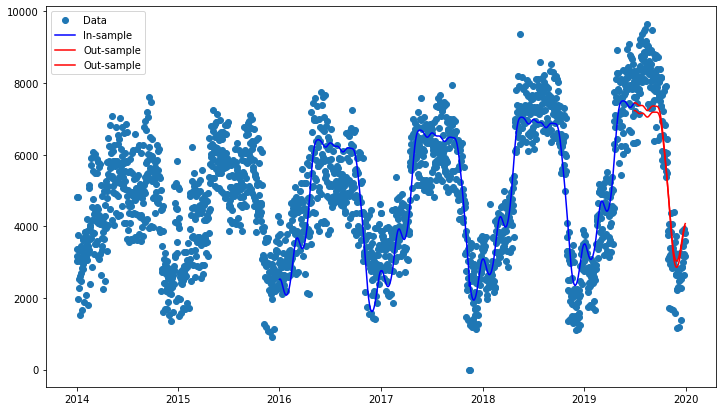

In [165]:
rslt_10 = sm.wls(formula=my_formula, data=y_to_train, weights=y_w[:len(y_to_train)]).fit()
ypred = rslt_10.predict(y_to_train)
ypred_out_10 = rslt_10.predict(y_to_val)


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax'], "o", label="Data")
ax.plot(ypred, "b-", label="In-sample")
ax.plot(ypred_out_10, "r-", label="Out-sample")
ax.plot(ypred_out_2, "r-", label="Out-sample")
ax.legend(loc="best")

mse2 = ((ypred_out_10 - y_to_val['Pay_pax']) ** 2).mean()
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse2), 2)))

## Testing the Holt-Winter method (additive)

In [166]:
#Set up a function for Holt-Winter's Seasonal Method
def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):

    if seasonal_type == 'additive':
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        fcast2_insample = fcast2[:'2017']
        fcast2_outsample = fcast2['2018':]
        mse2 = ((fcast2_outsample - y_to_test['2018':]) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fig, ax = plt.subplots(figsize=(12,7))
        ax.plot(y, "o", label="Data")
        ax.plot(fit2.fittedvalues, "b-", label="In-sample")
        ax.plot(fcast2_outsample, "r-", label="Out-sample")
        ax.legend(loc="best")
    
    
    
    elif seasonal_type == 'multiplicative':  
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='mul', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        fcast4_insample = fcast4[:'2017']
        fcast4_outsample = fcast4['2018':]
        mse4 = ((fcast4['2018':] - y_to_test['2018':]) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fig, ax = plt.subplots(figsize=(12,7))
        ax.plot(y, "o", label="Data")
        ax.plot(fit4.fittedvalues, "b-", label="In-sample")
        ax.plot(fcast4_outsample, "r-", label="Out-sample")
        ax.legend(loc="best")
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

<ipython-input-166-f9e3e460c961>:5: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=365 and a Box-Cox transformation 1365.88


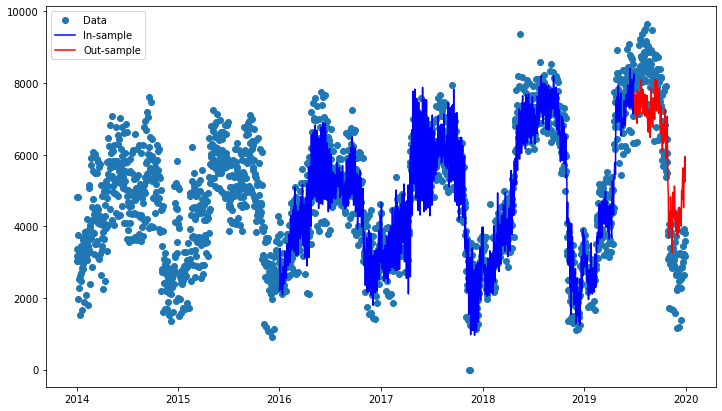

In [167]:
holt_win_sea(data['Pay_pax'], y_to_train['Pay_pax'],y_to_val['Pay_pax'],'additive',365, 184) #Call the function


<ipython-input-166-f9e3e460c961>:22: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='mul', seasonal='add', damped=True).fit(use_boxcox=True)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


The Root Mean Squared Error of additive damped trend, multiplicative seasonal of period season_length=365 and a Box-Cox transformation 1769.51


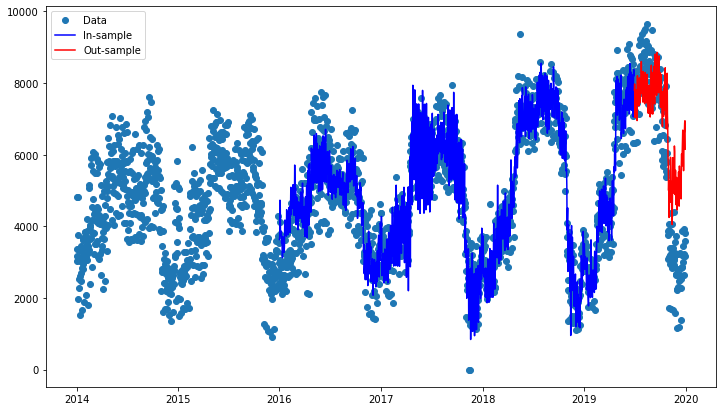

In [168]:
holt_win_sea(data['Pay_pax'], y_to_train['Pay_pax'],y_to_val['Pay_pax'],'multiplicative',365, 184) #Call the function

# incorporating volatility and average returns 

In [169]:
y_to_train['R_Mean_10'] = y_to_train['Pay_pax'].rolling(10).mean()
y_to_train['R_Vol_10'] = y_to_train['Pay_pax'].rolling(10).std()
y_to_train['R_Vol_50'] = y_to_train['Pay_pax'].rolling(50).std()

y_to_val['R_Mean_10'] = data['Pay_pax'].rolling(10).mean()['2019-07':]
y_to_val['R_Vol_10'] = data['Pay_pax'].rolling(10).std()['2019-07':]
y_to_val['R_Vol_50'] = data['Pay_pax'].rolling(50).std()['2019-07':]


<ipython-input-169-fc8ddc25b631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['R_Mean_10'] = y_to_train['Pay_pax'].rolling(10).mean()
<ipython-input-169-fc8ddc25b631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['R_Vol_10'] = y_to_train['Pay_pax'].rolling(10).std()
<ipython-input-169-fc8ddc25b631>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [170]:
my_formula = "Pay_pax ~ R_Mean_10 + R_Vol_50 + "+' + '.join(list(months.keys()))
my_formula

'Pay_pax ~ R_Mean_10 + R_Vol_50 + Jan + Feb + Mar + Apr + May + June + July + Aug + Sep + Oct + Nov + Dec'

                            OLS Regression Results                            
Dep. Variable:                Pay_pax   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     521.8
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:19:10   Log-Likelihood:                -9774.7
No. Observations:                1228   AIC:                         1.958e+04
Df Residuals:                    1213   BIC:                         1.966e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.347e+05   2.74e+05      2.319      0.0

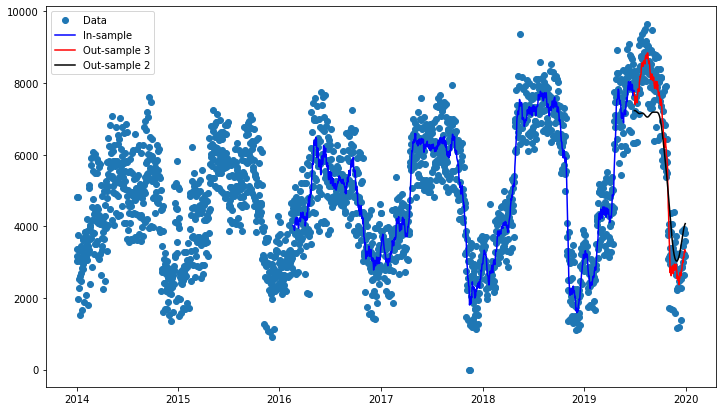

In [171]:
rslt = sm.ols(formula=my_formula, data=y_to_train).fit()
ypred = rslt.predict(y_to_train)
ypred_out_3 = rslt.predict(y_to_val)
print(rslt.summary())


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax'], "o", label="Data")
ax.plot(ypred, "b-", label="In-sample")
ax.plot(ypred_out_3, "r-", label="Out-sample 3")
ax.plot(ypred_out_2, "black", label="Out-sample 2")
ax.legend(loc="best")

mse2 = ((ypred_out_3 - y_to_val['Pay_pax']) ** 2).mean()
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse2), 2)))

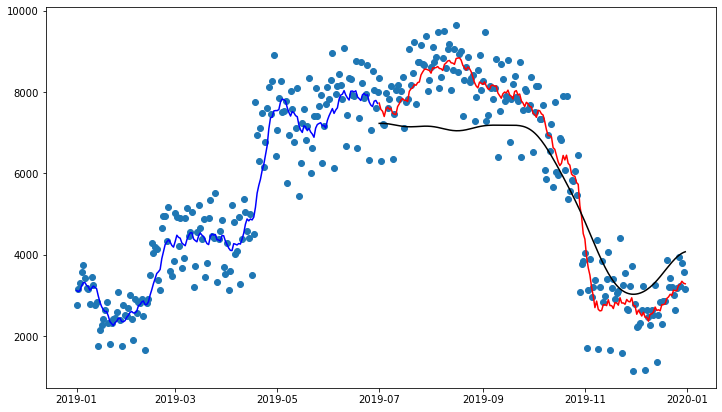

In [172]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax']['2019':], "o", label="Data")
ax.plot(ypred['2019':], "b-", label="In-sample")
ax.plot(ypred_out_3, "r-", label="Out-sample 3")
ax.plot(ypred_out_2, "black", label="Out-sample 2")
plt.show()

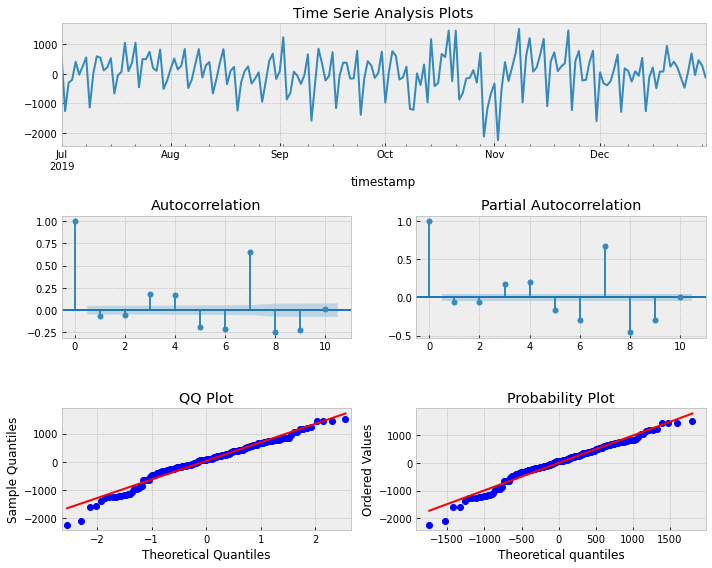

In [173]:
err3 = (data['Pay_pax']['2019-07':] - ypred_out_3)
tsplot(err3, lags=10)

# Incorporating weekly pattern 

In [174]:
y_to_train['L_7'] = y_to_train['Pay_pax'].shift(-7)
y_to_val['L_7'] = data['Pay_pax'].shift(-7)['2019-07':]

<ipython-input-174-960820bb2cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_train['L_7'] = y_to_train['Pay_pax'].shift(-7)
<ipython-input-174-960820bb2cc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_val['L_7'] = data['Pay_pax'].shift(-7)['2019-07':]


In [175]:
my_formula = "Pay_pax ~ L_7 + R_Mean_10 + R_Vol_50 + "+' + '.join(list(months.keys()))
my_formula

'Pay_pax ~ L_7 + R_Mean_10 + R_Vol_50 + Jan + Feb + Mar + Apr + May + June + July + Aug + Sep + Oct + Nov + Dec'

                            OLS Regression Results                            
Dep. Variable:                Pay_pax   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1068.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:19:14   Log-Likelihood:                -9279.7
No. Observations:                1221   AIC:                         1.859e+04
Df Residuals:                    1205   BIC:                         1.867e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.523e+05   1.94e+05     -2.334      0.0

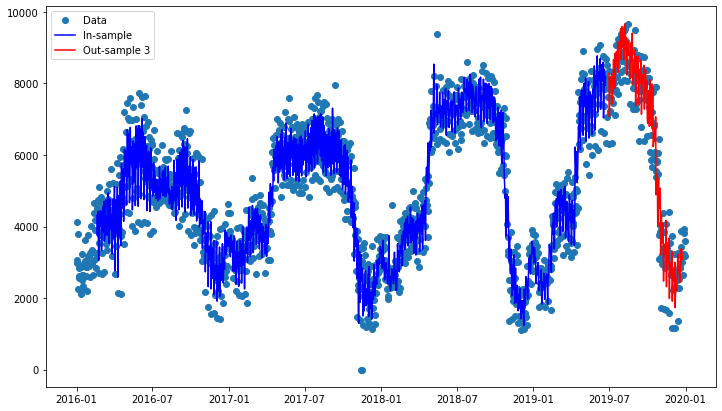

In [176]:
rslt = sm.ols(formula=my_formula, data=y_to_train).fit()
ypred = rslt.predict(y_to_train)
ypred_out_4 = rslt.predict(y_to_val)
print(rslt.summary())


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax']['2016':], "o", label="Data")
ax.plot(ypred, "b-", label="In-sample")
ax.plot(ypred_out_4, "r-", label="Out-sample 3")
ax.legend(loc="best")

mse2 = ((ypred_out_4 - y_to_val['Pay_pax']) ** 2).mean()
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse2), 2)))

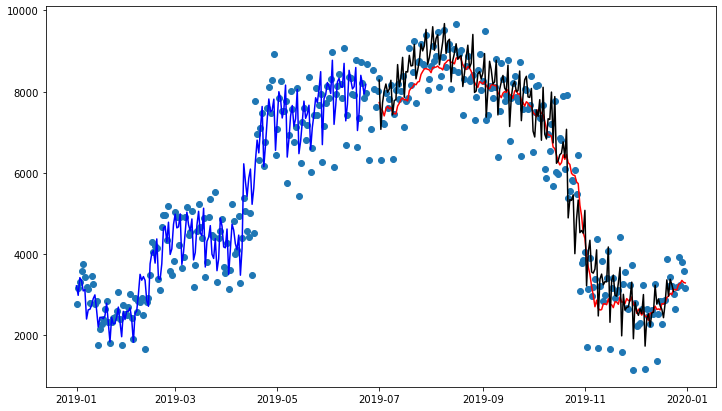

In [177]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Pay_pax']['2019':], "o", label="Data")
ax.plot(ypred['2019':], "b-", label="In-sample")
ax.plot(ypred_out_3, "r-", label="Out-sample 3")
ax.plot(ypred_out_4, "black", label="Out-sample 4")
plt.show()

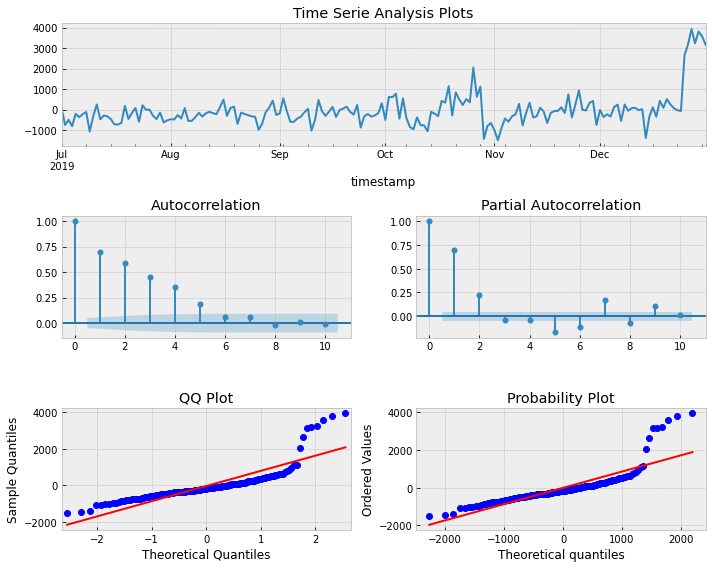

In [178]:
ypred_out_4 = ypred_out_4.fillna(0)
err4 = (data['Pay_pax']['2019-07':] - ypred_out_4)
tsplot(err4, lags=10)